In [1]:
from sklearn.datasets import make_blobs

In [2]:
import matplotlib.pyplot as plt

In [75]:
centroids = [(-5,-5), (5, 5), (-2.5, 2.5), (2.5, -2.5)]
cluster_std = [1, 1, 1, 1]
X, y = make_blobs(n_samples=100, n_features=2, cluster_std=cluster_std, centers=centroids, random_state=2)

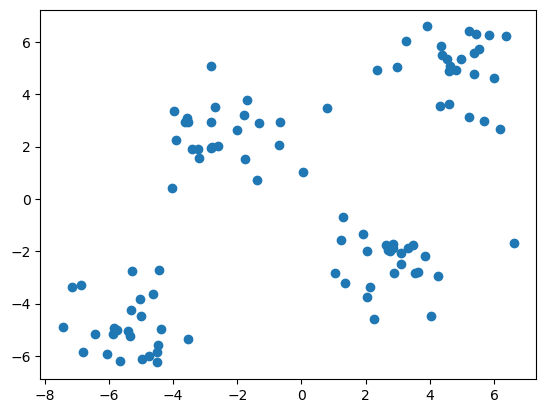

In [76]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [66]:
X.shape[0]

100

In [26]:
import random 
import numpy as np

In [67]:
class Kmeans:
    def __init__(self, n_cluster = 2, max_iter = 100):
        self.n_cluster = n_cluster
        self.max_iter = max_iter
        self.centroid = None
    
    def fit_predict(self, X):
        random_index = random.sample(range(0, X.shape[0]), self.n_cluster)
        self.centroid = X[random_index]
        for i in range(self.max_iter):
            cluster_group = self.assign_cluster(X)
            old_centroid = self.centroid
            self.centroid = self.move_centroid(X,cluster_group)
            if (old_centroid == self.centroid).all():
                break
        return cluster_group
            
            
    def assign_cluster(self, X):
        cluster_group = []
        
        distance = []
        
        for row in X:
            for centroid in self.centroid:
                distance.append(np.sqrt(np.dot(centroid-row , centroid-row)))
            min_dist = min(distance)
            index_pos = distance.index(min_dist)
            distance.clear()
            cluster_group.append(index_pos)
        return np.array(cluster_group)
    
    def move_centroid(self,X, cluster_group):
        new_centroid = []
        cluster = np.unique(cluster_group)
        
        for type in cluster:
            new_centroid.append(X[cluster_group == type].mean(axis = 0))
        return np.array(new_centroid)

In [83]:
km = Kmeans(n_cluster=4, max_iter=1)
y_mean = km.fit_predict(X)

In [84]:
y_mean

array([3, 1, 3, 1, 2, 3, 3, 0, 1, 2, 2, 2, 3, 2, 3, 2, 0, 1, 1, 1, 1, 1,
       3, 3, 2, 3, 3, 3, 1, 0, 2, 0, 3, 1, 3, 3, 2, 3, 2, 0, 3, 1, 0, 0,
       1, 0, 2, 3, 3, 2, 3, 1, 0, 0, 0, 1, 0, 1, 0, 3, 3, 3, 1, 0, 2, 3,
       0, 0, 0, 1, 0, 3, 3, 1, 0, 1, 1, 0, 0, 1, 2, 3, 3, 3, 2, 1, 3, 0,
       1, 3, 2, 1, 3, 0, 2, 1, 3, 3, 3, 2])

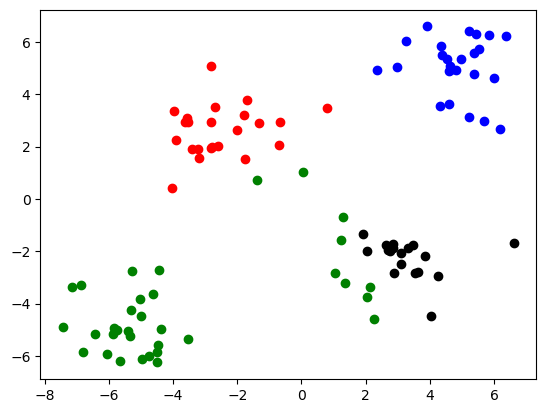

In [85]:
plt.scatter(X[y_mean == 0, 0], X[y_mean == 0, 1], color = 'red')
plt.scatter(X[y_mean == 1, 0], X[y_mean == 1, 1], color = 'blue')
plt.scatter(X[y_mean == 2, 0], X[y_mean == 2, 1], color = 'black')
plt.scatter(X[y_mean == 3, 0], X[y_mean == 3, 1], color = 'green')
plt.show()